<a href="https://colab.research.google.com/github/thomasshin/STAT1005_Intro_to_Data_Science/blob/main/Project_DCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***DATA UPLOADING***
Data uploaded from google drive

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/stat1005"

carInsurance_test_final.csv


In [ ]:
!cp "/content/drive/My Drive/stat1005/carInsurance_test_final.csv" "carInsurance_test_final.csv"

In [ ]:
!ls

carInsurance_test_final.csv  drive  sample_data


In [ ]:
#insurance variable for dataframe of csv file
insurance = pd.read_csv("carInsurance_test_final.csv")

### ***DATA CLEANING***
1. Rows with NaN were removed using iloc (There are rows filled with NaN)
2. Indexes were resetted using reset_index()
3. NA values in each feature were filled
4. New feature "CallDuration(min)" was created

In [ ]:
insurance.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,Rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4001.0,25.0,admin.,single,secondary,0.0,1.0,1.0,1.0,email,12.0,may,12.0,-1.0,0.0,NaN,17:17:42,17:18:06,1.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4002.0,40.0,management,married,tertiary,0.0,0.0,1.0,1.0,text,24.0,jul,1.0,-1.0,0.0,NaN,9:13:44,9:14:37,1.0,2.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#remove NaN rows
import numpy as np
insurance = insurance.iloc[np.arange(1,2000,2),:]
insurance

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,Rating
1,4001.0,25.0,admin.,single,secondary,0.0,1.0,1.0,1.0,email,12.0,may,12.0,-1.0,0.0,NaN,17:17:42,17:18:06,1.0,0.0
3,4002.0,40.0,management,married,tertiary,0.0,0.0,1.0,1.0,text,24.0,jul,1.0,-1.0,0.0,NaN,9:13:44,9:14:37,1.0,2.0
5,4003.0,44.0,management,single,tertiary,0.0,-1313.0,1.0,1.0,text,15.0,may,10.0,-1.0,0.0,NaN,15:24:07,15:25:51,0.0,3.0
7,4004.0,27.0,services,single,secondary,0.0,6279.0,1.0,0.0,text,9.0,nov,1.0,-1.0,0.0,NaN,9:43:44,9:48:01,0.0,2.0
9,4005.0,53.0,technician,married,secondary,0.0,7984.0,1.0,0.0,text,2.0,feb,1.0,-1.0,0.0,NaN,16:31:51,16:34:22,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,4996.0,31.0,admin.,single,secondary,0.0,131.0,1.0,0.0,text,15.0,jun,1.0,-1.0,0.0,NaN,13:54:24,13:56:55,0.0,3.0
1993,4997.0,52.0,management,married,tertiary,0.0,2635.0,0.0,0.0,text,6.0,sep,1.0,108.0,8.0,success,13:13:38,13:18:51,0.0,2.0
1995,4998.0,46.0,technician,married,tertiary,0.0,3009.0,0.0,0.0,text,4.0,aug,2.0,-1.0,0.0,NaN,10:23:35,10:24:33,1.0,0.0
1997,4999.0,60.0,retired,married,secondary,0.0,7038.0,0.0,0.0,telephone,7.0,oct,4.0,-1.0,0.0,NaN,17:01:49,17:04:07,1.0,3.0


In [ ]:
#reset_index
insurance.reset_index(inplace=True)

In [ ]:
insurance.drop(['index'], axis=1, inplace=True)

In [ ]:
insurance

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,Rating
0,4001.0,25.0,admin.,single,secondary,0.0,1.0,1.0,1.0,email,12.0,may,12.0,-1.0,0.0,NaN,17:17:42,17:18:06,1.0,0.0
1,4002.0,40.0,management,married,tertiary,0.0,0.0,1.0,1.0,text,24.0,jul,1.0,-1.0,0.0,NaN,9:13:44,9:14:37,1.0,2.0
2,4003.0,44.0,management,single,tertiary,0.0,-1313.0,1.0,1.0,text,15.0,may,10.0,-1.0,0.0,NaN,15:24:07,15:25:51,0.0,3.0
3,4004.0,27.0,services,single,secondary,0.0,6279.0,1.0,0.0,text,9.0,nov,1.0,-1.0,0.0,NaN,9:43:44,9:48:01,0.0,2.0
4,4005.0,53.0,technician,married,secondary,0.0,7984.0,1.0,0.0,text,2.0,feb,1.0,-1.0,0.0,NaN,16:31:51,16:34:22,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4996.0,31.0,admin.,single,secondary,0.0,131.0,1.0,0.0,text,15.0,jun,1.0,-1.0,0.0,NaN,13:54:24,13:56:55,0.0,3.0
996,4997.0,52.0,management,married,tertiary,0.0,2635.0,0.0,0.0,text,6.0,sep,1.0,108.0,8.0,success,13:13:38,13:18:51,0.0,2.0
997,4998.0,46.0,technician,married,tertiary,0.0,3009.0,0.0,0.0,text,4.0,aug,2.0,-1.0,0.0,NaN,10:23:35,10:24:33,1.0,0.0
998,4999.0,60.0,retired,married,secondary,0.0,7038.0,0.0,0.0,telephone,7.0,oct,4.0,-1.0,0.0,NaN,17:01:49,17:04:07,1.0,3.0


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1000 non-null   float64
 1   Age               1000 non-null   float64
 2   Job               995 non-null    object 
 3   Marital           1000 non-null   object 
 4   Education         953 non-null    object 
 5   Default           1000 non-null   float64
 6   Balance           1000 non-null   float64
 7   HHInsurance       1000 non-null   float64
 8   CarLoan           1000 non-null   float64
 9   Communication     1000 non-null   object 
 10  LastContactDay    1000 non-null   float64
 11  LastContactMonth  1000 non-null   object 
 12  NoOfContacts      1000 non-null   float64
 13  DaysPassed        1000 non-null   float64
 14  PrevAttempts      1000 non-null   float64
 15  Outcome           243 non-null    object 
 16  CallStart         1000 non-null   object 
 

In [ ]:
insurance['Job'].value_counts()

management       221
blue-collar      178
technician       163
admin.           127
services          84
retired           77
self-employed     42
unemployed        34
entrepreneur      28
student           27
housemaid         14
Name: Job, dtype: int64

In [ ]:
#fillna with "unemployed"
insurance['Job'].fillna('unemployed', inplace=True)

In [ ]:
insurance['Education'].value_counts()

secondary    501
tertiary     319
primary      133
Name: Education, dtype: int64

In [ ]:
#fillna with "unemployed"
insurance['Education'].fillna('tertiary', inplace=True)

In [ ]:
insurance['Education'].value_counts()

secondary    501
tertiary     366
primary      133
Name: Education, dtype: int64

In [ ]:
insurance['Outcome'].value_counts()

failure    111
success     79
other       53
Name: Outcome, dtype: int64

In [ ]:
#filling na
insurance['Outcome'].interpolate(method='pad', limit=3, inplace=True)

In [ ]:
#filling na
insurance['Outcome'].fillna(method='bfill', inplace=True)

In [ ]:
#change the type of "CallStart" and "CallEnd" to datetime
for i in ['CallStart', 'CallEnd']:
  insurance[i] = pd.to_datetime(insurance[i])

In [ ]:
#creating "callduration" column by "callend" - "callstart"
insurance['CallDuration'] = insurance['CallEnd'] - insurance['CallStart']

In [ ]:
#unit of callduration is minute
insurance.CallDuration = (insurance.CallDuration.dt.seconds) / 60

In [ ]:
insurance.CallDuration

0       0.400000
1       0.883333
2       1.733333
3       4.283333
4       2.516667
         ...    
995     2.516667
996     5.216667
997     0.966667
998     2.300000
999    15.250000
Name: CallDuration, Length: 1000, dtype: float64

In [ ]:
#change the name callduration to callduration(min)
insurance.rename(columns = {'CallDuration' : 'CallDuration(min)'}, inplace=True)

In [ ]:
#all the na filled
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Id                 1000 non-null   float64       
 1   Age                1000 non-null   float64       
 2   Job                1000 non-null   object        
 3   Marital            1000 non-null   object        
 4   Education          1000 non-null   object        
 5   Default            1000 non-null   float64       
 6   Balance            1000 non-null   float64       
 7   HHInsurance        1000 non-null   float64       
 8   CarLoan            1000 non-null   float64       
 9   Communication      1000 non-null   object        
 10  LastContactDay     1000 non-null   float64       
 11  LastContactMonth   1000 non-null   object        
 12  NoOfContacts       1000 non-null   float64       
 13  DaysPassed         1000 non-null   float64       
 14  PrevAttem

In [ ]:
#if the value of 'DaysPassed' = -1, then it is replaced with 0
insurance.loc[insurance['DaysPassed']<0, 'DaysPassed'] = 0

In [ ]:
insurance.DaysPassed

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
995      0.0
996    108.0
997      0.0
998      0.0
999      0.0
Name: DaysPassed, Length: 1000, dtype: float64

In [ ]:
insurance.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,...,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,Rating,CallDuration(min)
0,4001.0,25.0,admin.,single,secondary,0.0,1.0,1.0,1.0,email,...,may,12.0,0.0,0.0,success,2022-12-12 17:17:42,2022-12-12 17:18:06,1.0,0.0,0.400000
1,4002.0,40.0,management,married,tertiary,0.0,0.0,1.0,1.0,text,...,jul,1.0,0.0,0.0,success,2022-12-12 09:13:44,2022-12-12 09:14:37,1.0,2.0,0.883333
2,4003.0,44.0,management,single,tertiary,0.0,-1313.0,1.0,1.0,text,...,may,10.0,0.0,0.0,success,2022-12-12 15:24:07,2022-12-12 15:25:51,0.0,3.0,1.733333
3,4004.0,27.0,services,single,secondary,0.0,6279.0,1.0,0.0,text,...,nov,1.0,0.0,0.0,success,2022-12-12 09:43:44,2022-12-12 09:48:01,0.0,2.0,4.283333
4,4005.0,53.0,technician,married,secondary,0.0,7984.0,1.0,0.0,text,...,feb,1.0,0.0,0.0,success,2022-12-12 16:31:51,2022-12-12 16:34:22,0.0,5.0,2.516667


In [ ]:
insurance.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance', 'Rating',
       'CallDuration(min)'],
      dtype='object')

### ***OBJECTIVE 1***  
Use statistics method(s) (e.g. mean, mode, median) to extract average customer information who bought the insurance / sales information

In [ ]:
#calculate mean of 'Age', 'NoOfContacts', 'Balance', 'DaysPassed', 'CallDuration(min)' for each 'CarInsurance'
insurance.groupby(['CarInsurance']).mean().loc[:,['Age', 'NoOfContacts', 'Balance', 'DaysPassed', 'CallDuration(min)']]

,Age,NoOfContacts,Balance,DaysPassed,CallDuration(min)
CarInsurance,,,,,
0.0,41.448166,2.395534,1411.985646,51.175439,5.556486
1.0,41.514745,2.697051,1375.289544,54.485255,6.109205


In [ ]:
#calculate median of 'Age', 'NoOfContacts', 'Balance', 'DaysPassed', 'CallDuration(min)' for each 'CarInsurance'
insurance.groupby(['CarInsurance']).median().loc[:,['Age', 'NoOfContacts', 'Balance', 'DaysPassed', 'CallDuration(min)']]

,Age,NoOfContacts,Balance,DaysPassed,CallDuration(min)
CarInsurance,,,,,
0.0,39.0,2.0,529.0,0.0,3.833333
1.0,39.0,2.0,496.0,0.0,3.966667


In [ ]:
#calculate mode of 'Age', 'NoOfContacts', 'Balance', 'DaysPassed', 'CallDuration(min)' for each 'CarInsurance'
insurance.groupby(['CarInsurance']).agg(lambda x:x.value_counts().index[0]).loc[:,['Age', 'NoOfContacts', 'Balance', 'DaysPassed', 'CallDuration(min)']]

,Age,NoOfContacts,Balance,DaysPassed,CallDuration(min)
CarInsurance,,,,,
0.0,33.0,1.0,0.0,0.0,2.633333
1.0,33.0,1.0,0.0,0.0,2.316667


In [ ]:
#data manipulation : for row x, if the value of carinsurance is not 0, then its rating is 5
for i in range(len(insurance)):
  if (insurance.loc[i, "CarInsurance"] == 0):
    pass
  else:
    insurance.loc[i,"Rating"] = 5

In [ ]:
insurance.Rating.value_counts()[0]

52

In [ ]:
insurance.Rating.replace({0 : 0, 1 : 0, 2 : 0, 3 : 0, 4 : 1, 5 : 1}, inplace=True) #rating : [0,1,2,3] = 0, [4,5] = 1

In [ ]:
insurance.Rating.value_counts()

1.0    517
0.0    483
Name: Rating, dtype: int64

In [ ]:
insurance.Communication.replace({'text' : 0, 'email' : 1, 'telephone' : 2}, inplace=True) #mapping

### ***OBJECTIVE 2***  
Correlation Analysis using Heatmap

In [ ]:
import scipy.stats
#determine which factors (Age, NoOfContacts, Balance, DaysPassed, CallDuration(min)) are correlated with CarInsurance ; if p<0.05, correlation is signifcantly correlated, else correlation is not significant


#Age vs CarInsurance
#p greater than 0.05, Age is not correlated to CarInsurance
print("r value of Age and CarInsurance: ",scipy.stats.pearsonr(insurance.CarInsurance,insurance.Age)[0])
print("p value of Age and CarInsurance: ",scipy.stats.pearsonr(insurance.CarInsurance,insurance.Age)[1])
print()

#NoOfContacts vs CarInsurance
#p greater than 0.05, NoOfContacts is not correlated to CarInsurance
print("r value of NoOfContacts and CarInsurance: ",scipy.stats.pearsonr(insurance.CarInsurance,insurance.NoOfContacts)[0])
print("p value of NoOfContacts and CarInsurance: ",scipy.stats.pearsonr(insurance.CarInsurance,insurance.NoOfContacts)[1])
print()

#Balance vs CarInsurance
#p greater than 0.05, Balance is not correlated to CarInsurance
print("r value of Balance and CarInsurance: ",scipy.stats.pearsonr(insurance.CarInsurance,insurance.Balance)[0])
print("p value of Balance and CarInsurance: ",scipy.stats.pearsonr(insurance.CarInsurance,insurance.Balance)[1])
print()

#DaysPassed vs CarInsurance
#p greater than 0.05, DaysPassed is not correlated to CarInsurance
print("r value of DaysPassed and CarInsurance: ",scipy.stats.pearsonr(insurance.CarInsurance,insurance.DaysPassed)[0])
print("p value of DaysPassed and CarInsurance: ",scipy.stats.pearsonr(insurance.CarInsurance,insurance.DaysPassed)[1])
print()

#CallDuration vs CarInsurance
#p greater than 0.05, CallDuration is not correlated to CarInsurance
print("r value of CallDuration_min and CarInsurance: ",scipy.stats.pearsonr(insurance.CarInsurance,insurance["CallDuration(min)"])[0])
print("p value of CallDuration_min_ and CarInsurance: ",scipy.stats.pearsonr(insurance.CarInsurance,insurance["CallDuration(min)"])[1])




r value of Age and CarInsurance:  0.002673016806606948
p value of Age and CarInsurance:  0.932720404991994

r value of NoOfContacts and CarInsurance:  0.056604165013259086
p value of NoOfContacts and CarInsurance:  0.07358636171249995

r value of Balance and CarInsurance:  -0.006673860489916395
p value of Balance and CarInsurance:  0.8330555219471294

r value of DaysPassed and CarInsurance:  0.014738153623728836
p value of DaysPassed and CarInsurance:  0.6415707809630493

r value of CallDuration_min and CarInsurance:  0.04716174408213172
p value of CallDuration_min_ and CarInsurance:  0.13613241070941928


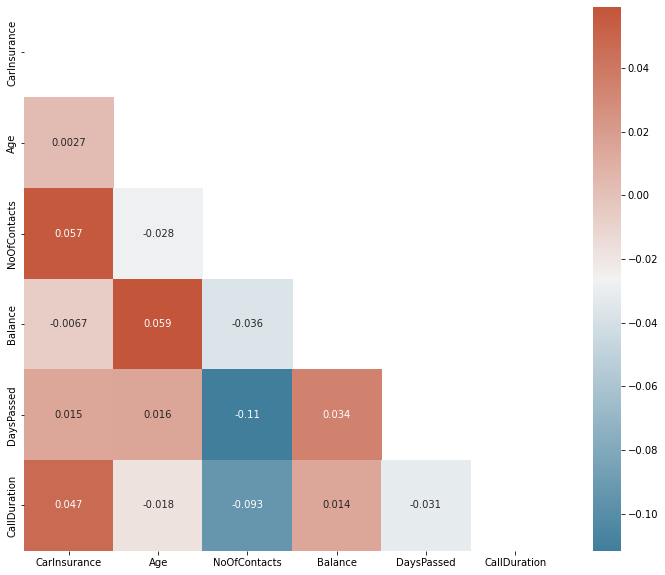

In [ ]:
#produce a heatmap to represent the correlation between variables
import seaborn as sns
df = pd.DataFrame({'CarInsurance':insurance.CarInsurance, 'Age':insurance.Age, 'NoOfContacts':insurance.NoOfContacts, 'Balance':insurance.Balance, 'DaysPassed':insurance.DaysPassed, 'CallDuration': insurance["CallDuration(min)"]})
corr = df.corr()
f, ax = plt.subplots(figsize=(12,10))
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(230,20, as_cmap= True)
sns.heatmap(corr, annot=True, mask = mask, cmap = cmap)

### ***OBJECTIVE 3***
Use regression model (Lasso) for feature selection

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
#dividing X to numerical and categorical
X_num = insurance[["Balance", "PrevAttempts", "CallDuration(min)", "DaysPassed", "NoOfContacts", "Age"]]
X_cat = insurance[["CarInsurance","LastContactDay","Job", "Marital", "Education", "Default", "HHInsurance", "CarLoan", "LastContactMonth", "Outcome",  "Communication"]]

y1 = insurance['Rating']

In [ ]:
#For numerical data
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_num, y1, test_size=0.25, random_state=42)

In [ ]:
#feature scaling
pipeline = Pipeline([('scaler', StandardScaler()), ('model', Lasso())])

In [ ]:
#use GridSearchCV to find out the best hyperparameter for our data
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5,scoring="neg_mean_squared_error"
                      )

In [ ]:
search.fit(X1_train, y1_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error')

In [ ]:
#the best parameter of numerical data is alpha of 0.1
search.best_params_

{'model__alpha': 0.1}

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [ ]:
#Importance of each feature can be determined by its coefficient
#According to this analysis, each feature has no correlation with rating
importance = np.abs(coefficients)
importance

array([0., 0., 0., 0., 0., 0.])

In [ ]:
#For categorical data
X2_train, X2_test, y2_train, y2_test = train_test_split(X_cat, y1, test_size=0.25, random_state=42)

In [ ]:
#Feature scaling
pipeline1 = Pipeline([('odi', OrdinalEncoder()), ('model', Lasso())])

In [ ]:
search = GridSearchCV(pipeline1,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error"
                      )

In [ ]:
search.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('odi', OrdinalEncoder()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error')

In [ ]:
#the best parameter for categorical data is alpha of 0.1
search.best_params_

{'model__alpha': 0.1}

In [ ]:
#Importance of each feature can be determined by its coefficient
#According to this analysis, CarInsurance and LastContactDay are correlated with rating with coefficient of 0.35 and 0.0018 respectively
coefficients1 = search.best_estimator_.named_steps['model'].coef_
importance1 = np.abs(coefficients1)
importance1

array([0.35060788, 0.00179868, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

### ***OBJECTIVE 4***
Sentiment Analysis

In [ ]:
#compare ratings to each communication channel ('text' : 0, 'email' : 1, 'telephone' : 2) and from there the channel with the highest average rating

new_df = insurance[['Communication','Rating']].copy()
new_df.Communication.value_counts() #get number


0    698
1    221
2     81
Name: Communication, dtype: int64

In [ ]:
#Method 1 to show the count for each communication and rating
#The most effective method for cold calling as its success rate is 57.47%, which is calculated by number of 1 / (number of 0 + number of 1)
dups_Communication_Rating = new_df.pivot_table(columns=['Communication','Rating',], aggfunc='size')
print(dups_Communication_Rating)


Communication  Rating
0              0.0       340
               1.0       358
1              0.0        94
               1.0       127
2              0.0        49
               1.0        32
dtype: int64


### ***OBJECTIVE 5***
Use prediction model to find out if the customer will subscribe or not

In [ ]:
y = insurance.Rating.copy()
X = insurance[["Age", "Communication", "CallDuration(min)", "DaysPassed", "NoOfContacts"]].copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
#feature scaling of categorical data : one-hot encoding
#feature scaling of numerical data : standardization
numeric_transformer = Pipeline(steps = [(
                        'scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[(
                            'ohe', OneHotEncoder(drop = 'first'))])

preprocessor = ColumnTransformer(transformers = [
                ('num', numeric_transformer, ["CallDuration(min)", "DaysPassed", "NoOfContacts", "Age"]),
                ('cat', categorical_transformer, ["Communication"])])

In [ ]:
#Standardization of numerical data
scalerr = StandardScaler()
df1 = insurance[["CallDuration(min)", "DaysPassed", "NoOfContacts", "Age"]].copy()
scaled = scalerr.fit_transform(df1)
scaled_df = pd.DataFrame(scaled, columns=["CallDuration(min)", "DaysPassed", "NoOfContacts", "Age"])
scaled_df

,CallDuration(min),DaysPassed,NoOfContacts,Age
0,-0.946187,-0.482575,3.684738,-1.367559
1,-0.860907,-0.482575,-0.585397,-0.122286
2,-0.710933,-0.482575,2.908350,0.209787
3,-0.261011,-0.482575,-0.585397,-1.201523
4,-0.572722,-0.482575,-0.585397,0.956951
...,...,...,...,...
995,-0.572722,-0.482575,-0.585397,-0.869450
996,-0.096333,0.511856,-0.585397,0.873933
997,-0.846204,-0.482575,-0.197203,0.375823
998,-0.610951,-0.482575,0.579186,1.538078


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


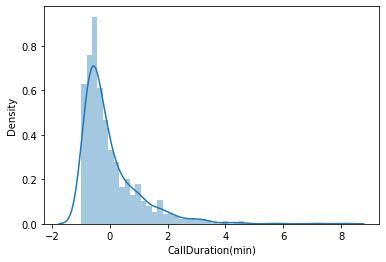

In [ ]:
#Distribution of standardized "CallDuration(min)"
sns.distplot(scaled_df["CallDuration(min)"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


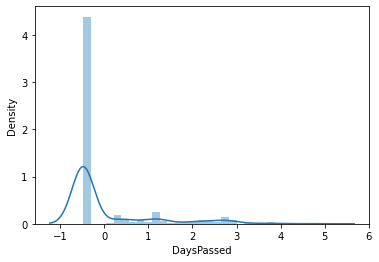

In [ ]:
#Distribution of standardized "DaysPassed"
sns.distplot(scaled_df["DaysPassed"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


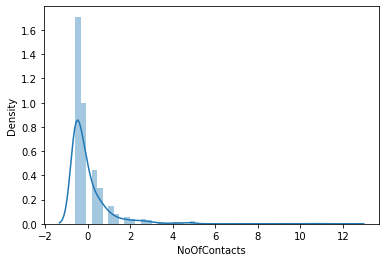

In [ ]:
#Distribution of standardized "NoOfContacts"
sns.distplot(scaled_df["NoOfContacts"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


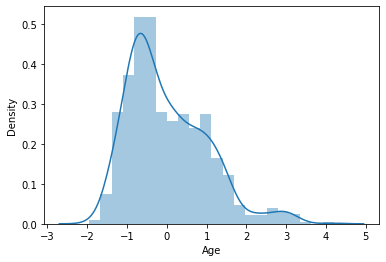

In [ ]:
#Distribution of standardized "Age"
sns.distplot(scaled_df["Age"])

In [ ]:
#Use classification model for prediction
from sklearn.metrics import confusion_matrix
lst0 = ['Logistic Regression', 'RandomForestClassifier', 'XGBClassifier', 'SVC']
lst1 = []
acc = []
rec = []
prec = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
for i in  [LogisticRegression(), RandomForestClassifier(random_state=0), XGBClassifier(random_state=0), SVC(gamma='auto')]:
  clf = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', i)])
  clf.fit(X_train, y_train)
  prediction = clf.predict(X_test)
  lst1.append(prediction)

for idx, val in enumerate(lst1):
  print(lst0[idx])
  print("Accuracy : ", accuracy_score(y_test, lst1[idx]))
  print("Recall : ", recall_score(y_test, lst1[idx]))
  print("Precision : ", precision_score(y_test, lst1[idx]))
  acc.append(accuracy_score(y_test, lst1[idx]))
  rec.append(recall_score(y_test, lst1[idx]))
  prec.append(precision_score(y_test, lst1[idx]))

cm_lr = confusion_matrix(lst1[0], y_test)
cm_rf = confusion_matrix(lst1[1], y_test)
cm_xgb = confusion_matrix(lst1[2], y_test)
cm_svm = confusion_matrix(lst1[3], y_test)

Logistic Regression
Accuracy :  0.61
Recall :  0.8090909090909091
Precision :  0.6095890410958904
RandomForestClassifier
Accuracy :  0.52
Recall :  0.5545454545454546
Precision :  0.5648148148148148
XGBClassifier
Accuracy :  0.435
Recall :  0.4727272727272727
Precision :  0.48598130841121495
SVC
Accuracy :  0.6
Recall :  0.6181818181818182
Precision :  0.6415094339622641


In [ ]:
#A function for creating confusion matrix
import seaborn as sns
def create_cm(cm, title):
  sns.heatmap(cm, annot=True, fmt = ".0f")
  plt.yticks([1.5,0.5], [0, 1])
  plt.xticks([1.5,0.5], [0, 1])
  plt.ylabel("Actual")
  plt.xlabel("Predicted")
  plt.title(title)

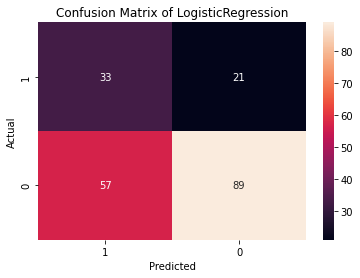

In [ ]:
create_cm(cm_lr, "Confusion Matrix of LogisticRegression")

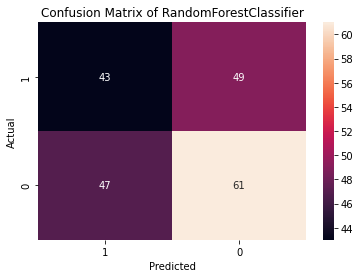

In [ ]:
create_cm(cm_rf, "Confusion Matrix of RandomForestClassifier")

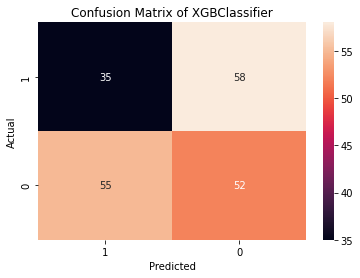

In [ ]:
create_cm(cm_xgb, "Confusion Matrix of XGBClassifier")

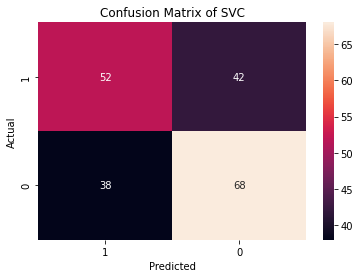

In [ ]:
create_cm(cm_svm, "Confusion Matrix of SVC")

In [ ]:
#Finding out the best hyperparameter for Logistic Regression
from sklearn.model_selection import GridSearchCV
clf1 = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())])

param_grid1 = {'classifier__penalty' : ['none','l2'], 'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100], 'classifier__solver' : ['newton-cg','lbfgs']}

search = GridSearchCV(clf1, n_jobs=-1, param_grid= param_grid1, cv = 7)
search.fit(X_train, y_train)
print("The best parameter for Logistic Regression :", search.best_params_)

The best parameter for Logistic Regression : {'classifier__C': 0.001, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}


In [ ]:
#Performance of Logistic Regression after tuning
clf3 = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', LogisticRegression(C=0.001, penalty='l2', solver='newton-cg'))])
clf3.fit(X_train, y_train)
pred1 = clf3.predict(X_test)
print("Accuracy after tuning : ", accuracy_score(y_test, pred1))
print("Recall after tuning : ", recall_score(y_test, pred1))
print("Precision after tuning : ", precision_score(y_test, pred1))

Accuracy after tuning :  0.535
Recall after tuning :  0.9636363636363636
Precision after tuning :  0.5435897435897435


In [ ]:
#Finding out the best hyperparameter for SVC
from sklearn.model_selection import GridSearchCV
clf2 = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('classifier', SVC())])

param_grid = {'classifier__C':[0.01, 0.1, 1,10,100], 'classifier__kernel':['linear','rbf']}

search1 = GridSearchCV(clf2, n_jobs=-1, param_grid= param_grid, cv = 7)
search1.fit(X_train, y_train)
print("The best parameter for SVC :", search1.best_params_)

The best parameter for SVC : {'classifier__C': 1, 'classifier__kernel': 'linear'}


In [ ]:
#Performance of SVC after tuning
clf5 = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', SVC(C=1, kernel='linear'))])
clf5.fit(X_train, y_train)
pred2 = clf5.predict(X_test)
print("Accuracy after tuning : ", accuracy_score(y_test, pred2))
print("Recall after tuning : ", recall_score(y_test, pred2))
print("Precision after tuning : ", precision_score(y_test, pred2))

Accuracy after tuning :  0.555
Recall after tuning :  0.9545454545454546
Precision after tuning :  0.5555555555555556


In [ ]:
#lists for each metrics,model before and after tuning
acc_log = [0.61, accuracy_score(y_test, pred1)]
rec_log = [0.8090909090909091, recall_score(y_test, pred1)]
prec_log = [0.6095890410958904, precision_score(y_test, pred1)]
acc_svc = [0.60, accuracy_score(y_test, pred2)]
rec_svc = [0.6181818181818182, recall_score(y_test, pred2)]
prec_svc = [0.6415094339622641, precision_score(y_test, pred2)]

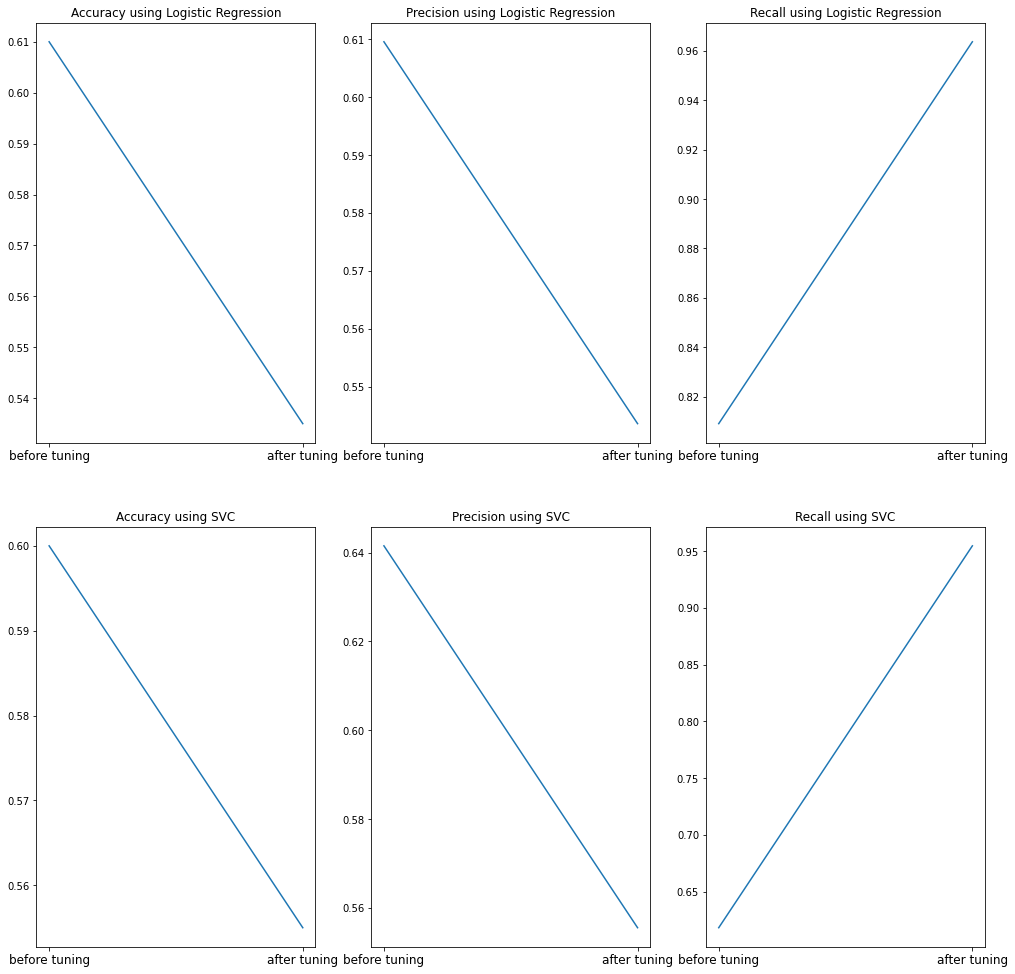

In [ ]:
#Graphs showing the change in metrics of Logistic Regression and SVC before and after tuning hyperparameters
y = acc_log.copy()
x = [0,1]
x_ticks_labels = ['before tuning', 'after tuning']
fig, ax = plt.subplots(2,3, figsize = (17,17))
ax[0,0].plot(x,y)
ax[0,0].set_xticks(x)
ax[0,0].set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=12)
ax[0,0].title.set_text("Accuracy using Logistic Regression")

y0 = prec_log.copy()
ax[0,1].plot(x,y0)
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=12)
ax[0,1].title.set_text("Precision using Logistic Regression")

y1 = rec_log.copy()
ax[0,2].plot(x,y1)
ax[0,2].set_xticks(x)
ax[0,2].set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=12)
ax[0,2].title.set_text("Recall using Logistic Regression")

y2 = acc_svc.copy()
ax[1,0].plot(x,y2)
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=12)
ax[1,0].title.set_text("Accuracy using SVC")

y3 = prec_svc.copy()
ax[1,1].plot(x,y3)
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=12)
ax[1,1].title.set_text("Precision using SVC")

y4 = rec_svc.copy()
ax[1,2].plot(x,y4)
ax[1,2].set_xticks(x)
ax[1,2].set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=12)
ax[1,2].title.set_text("Recall using SVC")

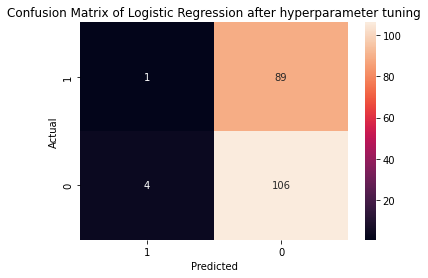

In [ ]:
#Confusion Matrix of Logistic Regression after hyperparameter tuning is then created
create_cm(confusion_matrix(y_test, pred1), "Confusion Matrix of Logistic Regression after hyperparameter tuning")

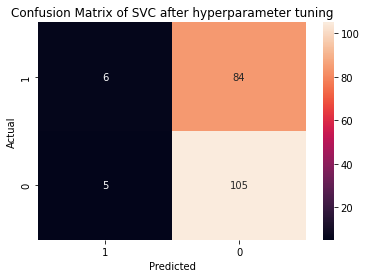

In [ ]:
#Confusion Matrix of SVC after hyperparameter tuning is then created
create_cm(confusion_matrix(y_test, pred2), "Confusion Matrix of SVC after hyperparameter tuning")

In [ ]:
%%shell
jupyter nbconvert --to html /content/stat1005_Dongchan_Shin.ipynb

[NbConvertApp] Converting notebook /content/stat1005_Dongchan_Shin.ipynb to html
[NbConvertApp] Writing 685839 bytes to /content/stat1005_Dongchan_Shin.html
